In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import gym
import time

env = gym.make('LunarLanderContinuous-v2')

<IPython.core.display.Javascript object>


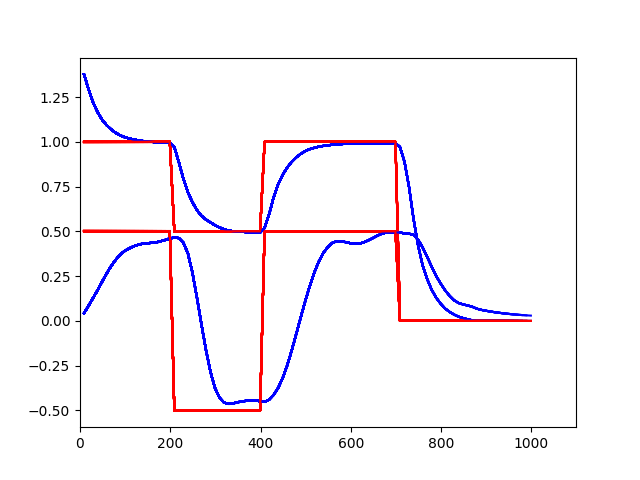

In [83]:
xG, yG = [], []
tG = []
target_yG, target_xG = [], []
plt.rcParams['animation.html'] = 'jshtml'
fig = plt.figure()
ax = fig.add_subplot(111)
fig.show()
graph_counter = 0

observation = env.reset()

target_x = 0.5
target_y = 1

p_y = 60
p_x = 35
p_angle = 30
p_thrust_angle = 0

d_y = -50
d_x = -30
d_angle = 20

dif_y_int = 0.0
i_y = 0.006



for i in range(1000):
    if i == 200:
        target_y = 0.5
        target_x = -0.5
    if i == 400:
        target_y = 1
        target_x = 0.5
    if i == 700:
        target_y = 0
        target_x = 0
    
    env.render()
#     time.sleep(0.01)
    
    x = observation[0]
    y = observation[1]
    v_x = observation[2]
    v_y = observation[3]
    angle = observation[4]
    v_angle = observation[5]
    
    dif_y_int += target_y - y
    
    thrust = 0
    stabilizers = 0
    
    thrust += (target_y - y) * p_y
    thrust += v_y * d_y
    thrust += angle * p_thrust_angle
    thrust += dif_y_int * i_y
    
    stabilizers += angle * p_angle
    stabilizers += (target_x - x) * p_x
    stabilizers += v_x * d_x
    stabilizers += v_angle * d_angle
    
    action = [thrust, stabilizers]
    
    ########## Cosmetic ##########    
    graph_counter += 1
    
    if graph_counter == 10:
        graph_counter = 0
        tG.append(i)
        yG.append(y)
        xG.append(x)
        target_yG.append(target_y)
        target_xG.append(target_x)

        ax.plot(tG, yG, color='b')
        ax.plot(tG, target_yG, color='r')
        ax.plot(tG, xG, color='b')
        ax.plot(tG, target_xG, color='r')
        fig.canvas.draw()
        ax.set_xlim(left=0, right=i+100)
    ##############################
    
    observation, reward, done, info = env.step(action)
    
    if done:
        break
env.close()